# Phân tích giỏ hàng, hành vi tiêu dùng để đưa ra chiến lược kinh doanh sử dụng khai phá luật kết hợp

## 1: Thu thập và phân tích dữ liệu


Cài đặt các thư viện hỗ trợ.

In [30]:
# from multiprocessing.reduction import duplicate
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn


Nhận thông tin về tập dữ liệu

In [31]:
import pandas as pd

file_path = 'CSVfile/ECommerce_consumer behaviour.csv'
data = pd.read_csv(file_path)
df = data.copy()

# Hiển thị 5 dòng đầu tiên (mặc định)
df.head().style.set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,nan,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,nan,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,nan,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,nan,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,nan,83,5,0,4,produce,fresh vegetables


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


### Mô tả các trường dữ liệu:
order_id: Mã số duy nhất đại diện cho từng đơn hàng.

user_id: Mã số duy nhất đại diện cho từng khách hàng, giúp nhận diện các đơn hàng của cùng một người dùng.

order_number: Số thứ tự của đơn hàng đối với mỗi người dùng, thể hiện số lần mua hàng của khách hàng đó.

order_hour_of_day: Giờ trong ngày mà các đơn hàng được thực hiện, thể hiện dưới dạng từ số 0 - 23 (tương ứng với hệ thống 24 giờ thực)

days_since_prior_order: Số ngày kể từ đơn hàng trước của khách hàng, cho phép đánh giá tần suất mua sắm của khách hàng.

product_id: Mã số duy nhất cho từng sản phẩm, liên kết với thông tin sản phẩm.

add_to_cart_order: Thứ tự mà sản phẩm được thêm vào giỏ hàng trong một đơn hàng cụ thể

reordered: Cho biết sản phẩm có được đặt lại hay không, tức là sản phẩm đã được khách hàng mua trước đó hay chưa thể hiện qua biến nhị phân 1 (có) hay 0 (không).

department_id: Mã số đại diện cho các danh mục mà sản phẩm thuộc về (ví dụ như đồ ăn, đồ uống, …)

department: Tên của các danh mục, mô tả hàng hóa mà sản phẩm thuộc về.

product_name: Tên của sản phẩm, cung cấp chi tiết về mặt hàng đã mua trong đơn hàng.

* Thống kê số lượng null ở mỗi cột

In [59]:
print("\nSố lượng giá trị bị thiếu trong mỗi cột:")
print(df.isnull().sum())


Số lượng giá trị bị thiếu trong mỗi cột:
order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64


* Thống kê số lượng giá trị duy nhất

In [34]:
# Danh sách các cột để thống kê
columns_to_check = [
    'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
    'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered',
    'department_id', 'department', 'product_name'
]

# Thống kê số lượng giá trị duy nhất trong các cột
unique_values_counts = df[columns_to_check].nunique()

# Hiển thị kết quả
print("\nSố lượng giá trị duy nhất trong các cột là:")
print(unique_values_counts)


Số lượng giá trị duy nhất trong các cột là:
order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64


* Hiển thị các dữ liệu duy nhất của các cột:

In [35]:
print("\n Các giá trị duy nhất của Order_number:")
print(df['order_number'].unique())

print("\n Các giá trị duy nhất của Order_dow:")
print(df['order_dow'].unique())

print("\n Các giá trị duy nhất của Department:")
print(df['department'].unique())

print("\n Các giá trị duy nhất của days_since_prior_order:")
print(df['days_since_prior_order'].unique())


 Các giá trị duy nhất của Order_number:
[  1  14  81   3  11   5  12  78   2  10  13   8   6   4  23  59  25  36
  19   7  63  51  28   9  18  27  61  30  91  46  21  42  16  41  62  32
  52  20  56  15  68  33  50  38  17  55  44  26  72  67  29  45  58  43
  34  66  35  47  53  48  24  31  77  22  57  93  86  80  40  39  82  74
  49  37  71  69  70  60 100  96  75  87  90  54  98  65  76  83  84  79
  92  97  64  73  95  88  85  89  99  94]

 Các giá trị duy nhất của Order_dow:
[2 3 0 1 6 5 4]

 Các giá trị duy nhất của Department:
['pantry' 'dairy eggs' 'produce' 'canned goods' 'meat seafood' 'frozen'
 'bakery' 'beverages' 'breakfast' 'snacks' 'international' 'household'
 'personal care' 'babies' 'deli' 'dry goods pasta' 'missing' 'alcohol'
 'pets' 'bulk' 'other']

 Các giá trị duy nhất của days_since_prior_order:
[nan  3.  6.  7. 30. 20.  4.  8. 15. 10. 28.  9. 12. 11.  2. 25. 13. 29.
 14. 21.  5.  1. 18.  0. 19. 17. 22. 26. 24. 16. 23. 27.]


* Kiểm tra xem có sản phẩm nào mang nhiều id không và ngược lại

In [36]:
import pandas as pd

# Chọn 2 cột product_id và product_name
product_df = df[['product_id', 'product_name']].drop_duplicates()

# Kiểm tra nếu có nhiều hơn 1 product_id cho cùng một product_name
product_name_multiple_ids = product_df.groupby('product_name')['product_id'].nunique()
product_name_multiple_ids = product_name_multiple_ids[product_name_multiple_ids > 1]

if not product_name_multiple_ids.empty:
    print("Các sản phẩm có nhiều hơn 1 ID:")
    print(product_name_multiple_ids)
else:
    print("Không có sản phẩm nào có nhiều hơn 1 ID.")

# Kiểm tra nếu có nhiều hơn 1 product_name cho cùng một product_id
product_id_multiple_names = product_df.groupby('product_id')['product_name'].nunique()
product_id_multiple_names = product_id_multiple_names[product_id_multiple_names > 1]

if not product_id_multiple_names.empty:
    print("\nCác ID có nhiều hơn 1 sản phẩm:")
    print(product_id_multiple_names)
else:
    print("Không có ID nào ứng với nhiều hơn 1 sản phẩm.")


Không có sản phẩm nào có nhiều hơn 1 ID.
Không có ID nào ứng với nhiều hơn 1 sản phẩm.


* Kiểm tra 1 sản phẩm có nằm ở nhiều phân loại không:

In [37]:
import pandas as pd

# Kiểm tra nếu có nhiều hơn một department cho cùng một product_name
product_multiple_departments = df.groupby('product_name')['department'].nunique()
product_multiple_departments = product_multiple_departments[product_multiple_departments > 1]

if not product_multiple_departments.empty:
    print("Các sản phẩm có nhiều hơn 1 phòng ban (department):")
    print(product_multiple_departments)
else:
    print("Không có sản phẩm nào thuộc nhiều hơn 1 thể loại.")


Không có sản phẩm nào thuộc nhiều hơn 1 thể loại.


* trực quan hóa dữ liệu:

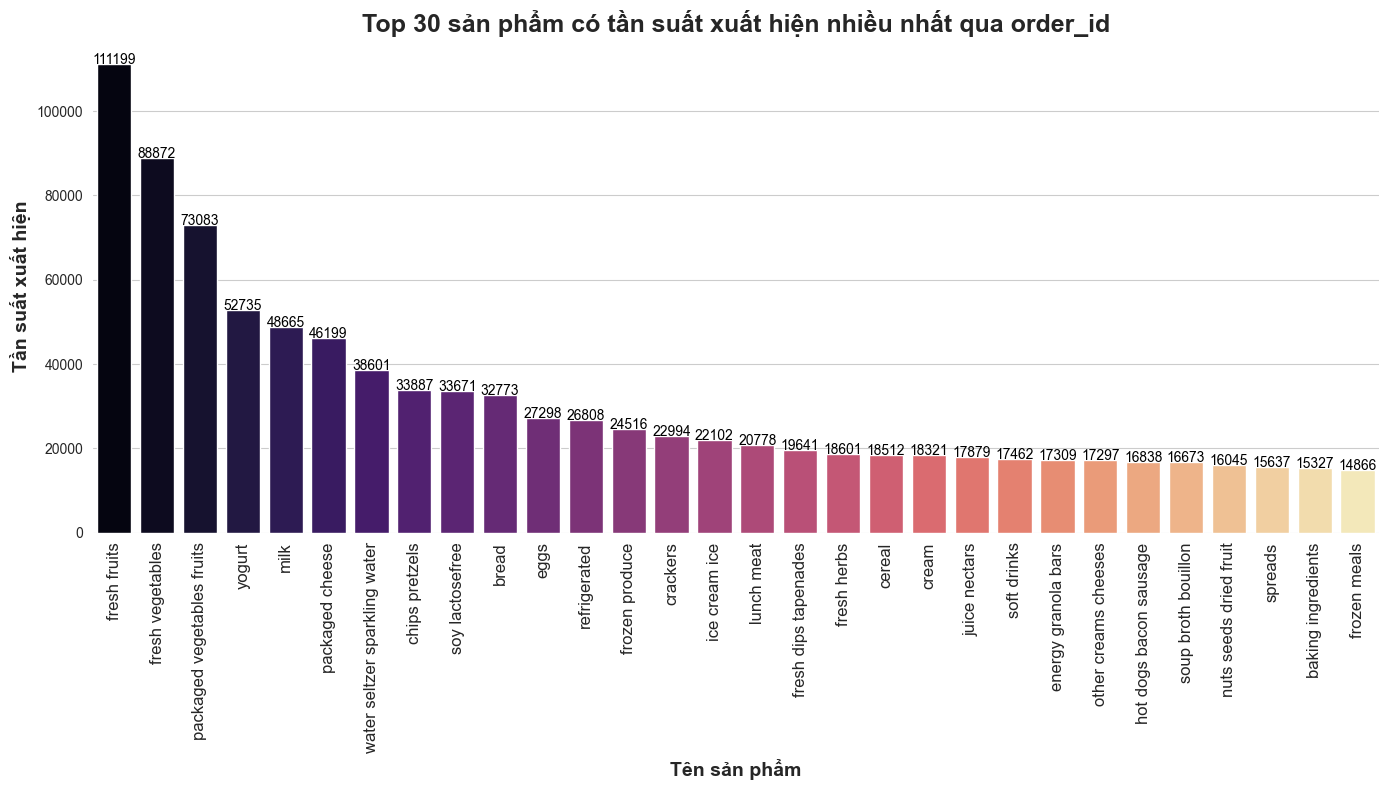

In [38]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = 'png'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Đếm tần suất xuất hiện của mỗi sản phẩm theo 'order_id'
product_frequency = df.groupby('product_name')['order_id'].nunique()

# Sắp xếp tần suất xuất hiện theo thứ tự giảm dần
product_frequency = product_frequency.sort_values(ascending=False).head(30)  # Lấy top 20 sản phẩm

# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(14, 8))  # Điều chỉnh kích thước cho biểu đồ thanh dọc

# Vẽ biểu đồ thanh dọc (x là tên sản phẩm, y là tần suất xuất hiện)
ax = sns.barplot(x=product_frequency.index, y=product_frequency.values, hue=product_frequency.index, palette="magma", legend=False)


# Thêm giá trị tần suất trực tiếp trên các thanh
for i, value in enumerate(product_frequency.values):
    ax.text(i, value + 0.5, f'{value}', ha='center', fontsize=10, color='black')

# Thiết lập tiêu đề và nhãn trục với kích thước font lớn hơn
plt.title("Top 30 sản phẩm có tần suất xuất hiện nhiều nhất qua order_id", fontsize=18, weight='bold')
plt.ylabel("Tần suất xuất hiện", fontsize=14, weight='bold')
plt.xlabel("Tên sản phẩm", fontsize=14, weight='bold')

# Xoay nhãn trục X để dễ đọc hơn (với sản phẩm dài)
plt.xticks(rotation=90, ha='center', fontsize=12)

# Làm sạch vùng xung quanh biểu đồ để tập trung vào nội dung chính
sns.despine(left=True, bottom=True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.savefig(os.path.join(folder_path, 'product_frequency_plot.png'))  # Lưu dưới dạng file PNG
plt.show()


In [39]:
folder_path = 'png'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
plt.tight_layout()
plt.savefig(os.path.join(folder_path, 'product_frequency_plot.png'))  # Lưu dưới dạng file PNG
plt.show()

<Figure size 640x480 with 0 Axes>

In [40]:
plt.savefig('png/product_frequency_plot.png')

<Figure size 640x480 with 0 Axes>

* Tần suất số lượng mặt hàng xuất hiện trong 1 giao dịch

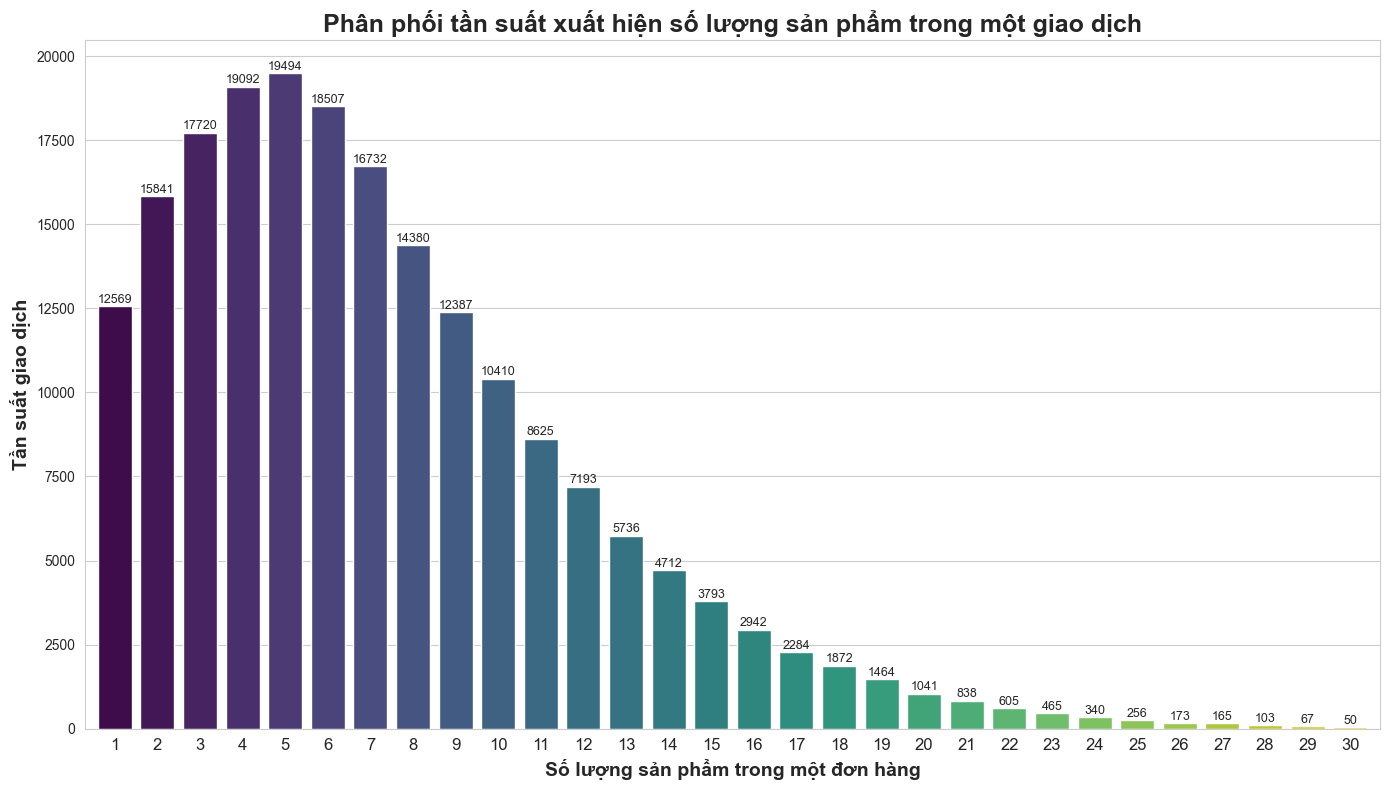

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df[['order_id', 'product_name']]
duplicate_rows = df_filtered.drop_duplicates()

# Đếm số lượng sản phẩm trong mỗi order_id
product_counts = duplicate_rows.groupby('order_id').size()

# Đếm tần suất số lượng sản phẩm trong các giao dịch
transaction_counts = product_counts.value_counts().head(30)

# Sắp xếp theo thứ tự giảm dần
transaction_counts = transaction_counts.sort_index()

# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(14, 8))  # Tăng chiều rộng biểu đồ

# Vẽ biểu đồ thanh
ax = sns.barplot(x=transaction_counts.index, y=transaction_counts.values, hue=transaction_counts.index, palette="viridis", legend=False)

# Thêm giá trị trực tiếp trên các thanh
for i, value in enumerate(transaction_counts.values):
    ax.text(i, value + 100, f'{value}', ha='center', fontsize=9)

# Thiết lập tiêu đề và nhãn trục với kích thước font lớn hơn
plt.title("Phân phối tần suất xuất hiện số lượng sản phẩm trong một giao dịch", fontsize=18, weight='bold')
plt.xlabel("Số lượng sản phẩm trong một đơn hàng", fontsize=14, weight='bold')
plt.ylabel("Tần suất giao dịch", fontsize=14, weight='bold')

# Xoay nhãn x và dãn khoảng cách giữa các cột
plt.xticks(rotation=0, fontsize=12)
ax.set_xticks(ax.get_xticks())  # Lấy các giá trị cột x hiện tại
ax.margins(x=0.01)  # Thêm khoảng trống giữa các cột

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


* Lựa chọn các thuộc tính và loại bỏ các thuộc tính không cần thiết:

In [42]:
import pandas as pd

# Lấy ra 2 cột 'order_id' và 'product_name'
df_product = df[['order_id', 'product_name']]

# Hiển thị 5 dòng đầu tiên của kết quả
print(df_product.head())

# Lấy ra số lượng dòng trong tập dữ liệu
num_rows = df_product.shape[0]

# In ra số lượng dòng
print(f"Số lượng dòng trong tập dữ liệu: {num_rows}")

   order_id        product_name
0   2425083  baking ingredients
1   2425083     soy lactosefree
2   2425083              butter
3   2425083    fresh vegetables
4   2425083    fresh vegetables
Số lượng dòng trong tập dữ liệu: 2019501


## 2: Tiền xử lý dữ liệu

* Kiểm tra dữ liệu thiếu

In [43]:
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(df_product.isnull().sum())


Số lượng giá trị thiếu trong mỗi cột:
order_id        0
product_name    0
dtype: int64


* Kiểm tra dữ liệu trùng lặp và xử lý

In [44]:
import pandas as pd

# Tìm các dòng trùng lặp
duplicate_rows = df_product.duplicated()

# Đếm số lượng dòng trùng lặp
num_duplicate_rows = duplicate_rows.sum()

# In ra số lượng dòng trùng lặp
print(f"Số lượng dòng trùng lặp trong tập dữ liệu: {num_duplicate_rows}")

Số lượng dòng trùng lặp trong tập dữ liệu: 566385


In [45]:
# Xóa các dòng trùng lặp
df_product = df_product.drop_duplicates()

# Lấy ra số lượng dòng sau khi xóa trùng lặp
num_rows_after = df_product.shape[0]

# In ra số lượng dòng sau khi xóa trùng lặp
print(f"Số lượng dòng trong tập dữ liệu sau khi xóa trùng lặp: {num_rows_after}")

# Hiển thị 5 dòng đầu tiên của DataFrame sau khi xóa trùng lặp
print("10 dòng đầu tiên của DataFrame sau khi xóa trùng lặp:")
print(df_product.head(10))

Số lượng dòng trong tập dữ liệu sau khi xóa trùng lặp: 1453116
10 dòng đầu tiên của DataFrame sau khi xóa trùng lặp:
    order_id        product_name
0    2425083  baking ingredients
1    2425083     soy lactosefree
2    2425083              butter
3    2425083    fresh vegetables
6    2425083              yogurt
7    2425083  canned meals beans
8    2425083     poultry counter
9    1944304       ice cream ice
10   1944304        fresh fruits
11   1944304    fresh vegetables


* Kiểm tra và xử lý các product là "missing" và "other"

In [46]:
import pandas as pd

# Đếm số dòng có giá trị là "missing" và "other"
missing_count = df_product[df_product['product_name'] == 'missing'].shape[0]
other_count = df_product[df_product['product_name'] == 'other'].shape[0]

print("Số dòng có giá trị là 'missing':", missing_count)
print("Số dòng có giá trị là 'other':", other_count)

print("Số bản ghi:", df_product.shape[0])

Số dòng có giá trị là 'missing': 4135
Số dòng có giá trị là 'other': 2148
Số bản ghi: 1453116


In [47]:
import pandas as pd

# Xóa các dòng có giá trị là "missing" hoặc "other"
df_cleaned = df_product[~df_product['product_name'].isin(['missing', 'other'])]
df_product = df_cleaned

# In kích thước của DataFrame sau khi xóa
print("Số bản ghi của DataFrame sau khi xóa:", df_cleaned.shape[0])

# Danh sách các cột để thống kê
columns_to_check = [
    'order_id', 'product_name'
]

# Thống kê số lượng giá trị duy nhất trong các cột
unique_values_counts = df_cleaned[columns_to_check].nunique()

# In kết quả
print("\nSố lượng giá trị duy nhất trong các cột:")
print(unique_values_counts)

Số bản ghi của DataFrame sau khi xóa: 1446833

Số lượng giá trị duy nhất trong các cột:
order_id        199954
product_name       132
dtype: int64


* Kiểm tra và xử lý các ô dữ liệu vô nghia

In [48]:
import pandas as pd
import re

# Hàm kiểm tra ký tự đặc biệt
def contains_special_char(value):
    if pd.isnull(value):  # Kiểm tra giá trị NaN
        return False
    # Kiểm tra xem chuỗi có ký tự đặc biệt không
    return bool(re.search(r'[^a-zA-Z0-9\s]', str(value)))

# Hàm kiểm tra khoảng trắng hoặc dữ liệu vô nghĩa
def is_invalid_data(value):
    # Kiểm tra chuỗi trống hoặc chỉ có khoảng trắng
    if isinstance(value, str) and value.strip() == '':
        return True
    # Kiểm tra ký tự đặc biệt
    if contains_special_char(value):
        return True
    return False

# Kiểm tra từng cột trong DataFrame
invalid_columns = {}
for col in df_product.columns:
    invalid_rows = df_product[col].apply(is_invalid_data)
    if invalid_rows.any():
        # Lưu lại các dòng có dữ liệu không hợp lệ
        invalid_columns[col] = df_product[invalid_rows]

# Hiển thị các cột và dòng có dữ liệu không hợp lệ
if invalid_columns:
    for col, rows in invalid_columns.items():
        print(f"Cột '{col}' có dữ liệu không hợp lệ:")
        print(rows)
else:
    print("Không có dữ liệu nào bị vô nghĩa.")


Không có dữ liệu nào bị vô nghĩa.


* Giao dịch có nhiều sản phẩm nhất

In [49]:
# Nhóm theo 'order_id' và đếm số lượng unique 'product_name'
unique_products_per_order = df_product.groupby('order_id')['product_name'].nunique()

# Tìm ra order_id có số lượng sản phẩm nhiều nhất
max_unique_products = unique_products_per_order.max()
order_with_max_unique_products = unique_products_per_order.idxmax()  # Lấy order_id có số lượng sản phẩm nhiều nhất

# Lọc ra các sản phẩm trong order_id này
products_in_order = df_product[df_product['order_id'] == order_with_max_unique_products]['product_name'].unique()

# In kết quả
print(f"order_id có nhiều sản phẩm nhất với: {max_unique_products} sản phẩm")
print("Các sản phẩm trong order đó:")
print(products_in_order)


order_id có nhiều sản phẩm nhất với: 45 sản phẩm
Các sản phẩm trong order đó:
['yogurt' 'fresh fruits' 'bread' 'eggs' 'packaged produce'
 'baby food formula' 'frozen produce' 'fresh vegetables'
 'energy granola bars' 'coffee' 'grains rice dried goods' 'crackers'
 'pasta sauce' 'tortillas flat bread' 'fresh dips tapenades'
 'packaged cheese' 'frozen appetizers sides' 'juice nectars'
 'soup broth bouillon' 'instant foods' 'laundry' 'canned meals beans'
 'doughs gelatins bake mixes' 'packaged vegetables fruits'
 'canned fruit applesauce' 'dish detergents' 'hot dogs bacon sausage'
 'oral hygiene' 'deodorants' 'cleaning products' 'cereal'
 'breakfast bakery' 'frozen breakfast' 'baby bath body care'
 'hot cereal pancake mixes' 'dry pasta' 'soy lactosefree' 'more household'
 'baking ingredients' 'granola' 'food storage' 'spreads'
 'frozen vegan vegetarian' 'salad dressing toppings' 'tea']


* Định dạng lại tập dữ liệu về dạng giao dịch.
    
  ** (Phù hợp khai phá luật kết hợp trên weka)

In [50]:
import pandas as pd

# Danh sách các sản phẩm duy nhất trong tập dữ liệu
all_products = df_product['product_name'].unique()

# Hàm để chuyển đổi mỗi giao dịch thành các giá trị True/False
def transaction_to_bool(transaction, all_products):
    # Tạo một dictionary với các sản phẩm, mặc định giá trị là False
    product_dict = {product: False for product in all_products}
    # Đặt các sản phẩm xuất hiện trong giao dịch thành True
    for product in transaction:
        product_dict[product] = True
    return product_dict

# Gom các giao dịch lại dựa trên 'order_id'
transactions = df_product.groupby('order_id')['product_name'].apply(list)

# Áp dụng hàm chuyển đổi cho mỗi giao dịch
bool_transactions = transactions.apply(lambda x: transaction_to_bool(x, all_products))

# Chuyển từ dictionary sang DataFrame
transaction_df = pd.DataFrame(bool_transactions.tolist())

# Lưu kết quả ra file CSV hoặc ARFF
output_file_path = 'CSVfile/transactions_output.csv' # Đường dẫn lưu file kết quả
transaction_df.to_csv(output_file_path, index=False)

print("File đã được xuất thành công.")
transaction_df.head().style.set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})


File đã được xuất thành công.


,baking ingredients,soy lactosefree,butter,fresh vegetables,yogurt,canned meals beans,poultry counter,ice cream ice,fresh fruits,milk,packaged cheese,bread,tea,bakery desserts,frozen breakfast,cereal,eggs,buns rolls,cream,water seltzer sparkling water,pickled goods olives,packaged poultry,other creams cheeses,honeys syrups nectars,coffee,refrigerated,energy granola bars,soft drinks,latino foods,plates bowls cups flatware,paper goods,oral hygiene,diapers wipes,food storage,nuts seeds dried fruit,soap,packaged vegetables fruits,hot dogs bacon sausage,lunch meat,chips pretzels,meat counter,fresh dips tapenades,prepared soups salads,condiments,juice nectars,canned fruit applesauce,preserved dips spreads,packaged produce,canned jarred vegetables,fresh pasta,pasta sauce,frozen produce,frozen appetizers sides,soup broth bouillon,dry pasta,prepared meals,fresh herbs,hot cereal pancake mixes,spices seasonings,grains rice dried goods,frozen breads doughs,popcorn jerky,granola,muscles joints pain relief,energy sports drinks,crackers,candy chocolate,fruit vegetable snacks,tortillas flat bread,tofu meat alternatives,beers coolers,laundry,asian foods,frozen meat seafood,frozen meals,spreads,mint gum,cold flu allergy,breakfast bakery,trail mix snack mix,air fresheners candles,feminine care,breakfast bars pastries,instant foods,spirits,salad dressing toppings,doughs gelatins bake mixes,oils vinegars,baby food formula,eye ear care,dog food care,baby accessories,frozen pizza,marinades meat preparation,frozen vegan vegetarian,shave needs,specialty wines champagnes,cookies cakes,cleaning products,packaged seafood,bulk grains rice dried goods,frozen dessert,skin care,deodorants,white wines,protein meal replacements,canned meat seafood,digestion,trash bags liners,refrigerated pudding desserts,specialty cheeses,bulk dried fruits vegetables,red wines,body lotions soap,hair care,vitamins supplements,cocoa drink mixes,first aid,dish detergents,packaged meat,cat food care,indian foods,baking supplies decor,seafood counter,ice cream toppings,baby bath body care,more household,kosher foods,facial care,kitchen supplies,beauty,frozen juice
0,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,True,False,True,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [51]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199954 entries, 0 to 199953
Columns: 132 entries, baking ingredients to frozen juice
dtypes: bool(132)
memory usage: 25.2 MB


In [52]:
import pandas as pd

# Đọc dữ liệu từ file đã được tạo trước đó
file_path = 'CSVfile/transactions_output.csv'
data2 = pd.read_csv(file_path)
df2 = data2.copy()

# Tính tần suất xuất hiện của các sản phẩm
product_counts = df2.sum().sort_values(ascending=False)

# Lấy ra 30 sản phẩm có tần suất xuất hiện cao nhất
top_30_products = product_counts.head(30).index

# Giữ lại các cột tương ứng với 30 sản phẩm, các cột còn lại sẽ bị loại bỏ
df_weka = df2[top_30_products]

# Ghi kết quả ra file CSV mới
output_file_path = 'CSVfile/transactions_top_30_products.csv'
df_weka.to_csv(output_file_path, index=False)

print(f"File mới đã được lưu thành công tại {output_file_path}")
print('\n Số bản ghi: ', df_weka.shape[0])
# Hiển thị dữ liệu với định dạng Pandas Styler
df_weka.head().style.set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})


File mới đã được lưu thành công tại CSVfile/transactions_top_30_products.csv

 Số bản ghi:  199954


,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,milk,packaged cheese,water seltzer sparkling water,chips pretzels,soy lactosefree,bread,eggs,refrigerated,frozen produce,crackers,ice cream ice,lunch meat,fresh dips tapenades,fresh herbs,cereal,cream,juice nectars,soft drinks,energy granola bars,other creams cheeses,hot dogs bacon sausage,soup broth bouillon,nuts seeds dried fruit,spreads,baking ingredients,butter
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
3,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,True,True,True,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


* Kiểm tra và xử lý các giao dịch không có sản phẩm nào

In [53]:
# Kiểm tra bao nhiêu dòng mà tất cả các cột đều là False
false_rows = (df_weka == False).all(axis=1)
num_false_rows = false_rows.sum()
false_rows_df = df_weka[false_rows]

print(f"Số lượng dòng mà tất cả các cột đều là False: {num_false_rows}")
false_rows_df.head().style.set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})


Số lượng dòng mà tất cả các cột đều là False: 7653


,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,milk,packaged cheese,water seltzer sparkling water,chips pretzels,soy lactosefree,bread,eggs,refrigerated,frozen produce,crackers,ice cream ice,lunch meat,fresh dips tapenades,fresh herbs,cereal,cream,juice nectars,soft drinks,energy granola bars,other creams cheeses,hot dogs bacon sausage,soup broth bouillon,nuts seeds dried fruit,spreads,baking ingredients,butter
38,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
126,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
143,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
# Kiểm tra và xóa các dòng mà tất cả các cột đều là False
rows_to_keep = ~(df_weka == False).all(axis=1)  # Dùng dấu ~ để lấy những dòng không phải tất cả đều False
df_weka = df_weka[rows_to_keep]

# Ghi kết quả sau khi xóa các dòng có tất cả giá trị False ra file CSV mới
file_path = 'CSVfile/top_30_products.csv'
df_weka.to_csv(file_path, index=False)

print(f"File đã được lưu thành công sau khi xóa các dòng có tất cả giá trị là False tại {file_path}")

print(f"Số lượng bản ghi trong: {df_weka.shape[0]}")
# Hiển thị dữ liệu với định dạng Pandas Styler
df_weka.head().style.set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})

File đã được lưu thành công sau khi xóa các dòng có tất cả giá trị là False tại CSVfile/top_30_products.csv
Số lượng bản ghi trong: 192301


,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,milk,packaged cheese,water seltzer sparkling water,chips pretzels,soy lactosefree,bread,eggs,refrigerated,frozen produce,crackers,ice cream ice,lunch meat,fresh dips tapenades,fresh herbs,cereal,cream,juice nectars,soft drinks,energy granola bars,other creams cheeses,hot dogs bacon sausage,soup broth bouillon,nuts seeds dried fruit,spreads,baking ingredients,butter
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
3,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,True,True,True,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


* Kiêm tra và xử lý các giao dịch có 1 sản phẩm

In [55]:
# Đảm bảo các giá trị là Boolean 
df_weka1 = df_weka
df_weka1 = df_weka1.astype(bool)

# Tạo một DataFrame Boolean cho biết cột nào là true
true_counts = (df_weka1 == True).sum(axis=1)

# Lọc các dòng chỉ có 1 giá trị là true
one_true_row = df_weka1[true_counts == 1]

# Đếm số lượng các dòng chỉ có 1 giá trị là true
num_one_true_row = len(one_true_row)

# In ra kết quả
print(f"Số lượng dòng chỉ có 1 cột là true: {num_one_true_row}")
print("5 dòng đầu tiên:")
one_true_row.head().style.set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})


Số lượng dòng chỉ có 1 cột là true: 21787
5 dòng đầu tiên:


,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,milk,packaged cheese,water seltzer sparkling water,chips pretzels,soy lactosefree,bread,eggs,refrigerated,frozen produce,crackers,ice cream ice,lunch meat,fresh dips tapenades,fresh herbs,cereal,cream,juice nectars,soft drinks,energy granola bars,other creams cheeses,hot dogs bacon sausage,soup broth bouillon,nuts seeds dried fruit,spreads,baking ingredients,butter
20,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
28,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
57,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
# Xóa các dòng chỉ có 1 giá trị là true
df_weka1 = df_weka1[true_counts != 1]

# Đếm số lượng các dòng chỉ có 1 giá trị là true
count = len(df_weka1)

# In ra kết quả
print(f"Số lượng giao dịch: {count}")

df_weka = df_weka1
df_weka1.head().style.set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})


Số lượng giao dịch: 170514


,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,milk,packaged cheese,water seltzer sparkling water,chips pretzels,soy lactosefree,bread,eggs,refrigerated,frozen produce,crackers,ice cream ice,lunch meat,fresh dips tapenades,fresh herbs,cereal,cream,juice nectars,soft drinks,energy granola bars,other creams cheeses,hot dogs bacon sausage,soup broth bouillon,nuts seeds dried fruit,spreads,baking ingredients,butter
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True
3,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,True,True,True,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


* Đưa ra tập dữ liệu cuối cùng 

    ** (chạy trên weka) 

In [57]:
import pandas as pd
import numpy as np

# Thay thế False bằng NaN để xóa các ô có giá trị False
df_weka.replace(False, np.nan, inplace=True)

# Thay thế True bằng "t"
df_weka.replace(True, 't', inplace=True)

# Xuất kết quả ra file CSV
output_file_path = 'CSVfile/final_top_30_products.csv'
df_weka.to_csv(output_file_path, index=False)

print(f"File CSV đã được xuất thành công tại {output_file_path}")
print(f"Số bản ghi {df_weka.shape[0]}")

df_weka.head().style.set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})


File CSV đã được xuất thành công tại CSVfile/final_top_30_products.csv
Số bản ghi 170514


,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,milk,packaged cheese,water seltzer sparkling water,chips pretzels,soy lactosefree,bread,eggs,refrigerated,frozen produce,crackers,ice cream ice,lunch meat,fresh dips tapenades,fresh herbs,cereal,cream,juice nectars,soft drinks,energy granola bars,other creams cheeses,hot dogs bacon sausage,soup broth bouillon,nuts seeds dried fruit,spreads,baking ingredients,butter
0,t,t,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,t,nan,t,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan,t,nan,nan,nan,nan,nan,nan,nan,nan,t,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,t,t,nan,t,t,t,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,t,nan,nan,nan,t,nan,nan,nan,t,nan,t
3,nan,t,t,nan,nan,nan,nan,nan,nan,nan,nan,nan,t,nan,nan,nan,nan,t,nan,nan,nan,nan,nan,nan,nan,nan,t,nan,nan,nan
4,t,t,t,nan,nan,t,nan,nan,nan,nan,t,t,t,nan,nan,nan,nan,nan,nan,t,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


* Trực quan hóa sau khi tiền xử lý

In [58]:
# abc